# Structured Data

## Problem 2

### Summary

* Calculate and moniter the monthly Drop-off rate for "Target Drug" to understand patient discontinuation patterns over a year.

* Identify the specific events, such as adverse effects, financial constraints, or health changes, that drive patients to stop taking the drug.

* Develop interventions, including improved patient education and monitering, to address the identified events and improve adherence to the "Target Drug."

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the train data from a Parquet file
train_df = pd.read_parquet("Train.parquet")

In [3]:
# Filter the data to get users taking the "Target Drug"
target_data = train_df[train_df['Incident'] == 'TARGET DRUG']

In [4]:
# Convert the 'Date' column to a datetime object
target_data['Date'] = pd.to_datetime(target_data['Date'])

C:\Users\ganap\AppData\Local\Temp\ipykernel_22248\3406916997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Date'] = pd.to_datetime(target_data['Date'])


In [5]:
# Extract the month from the 'Date' and create a 'Month' column
target_data['Month'] = target_data['Date'].dt.month

C:\Users\ganap\AppData\Local\Temp\ipykernel_22248\1204448574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Month'] = target_data['Date'].dt.month


In [6]:
# Calculate the drop-off rate by month
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)


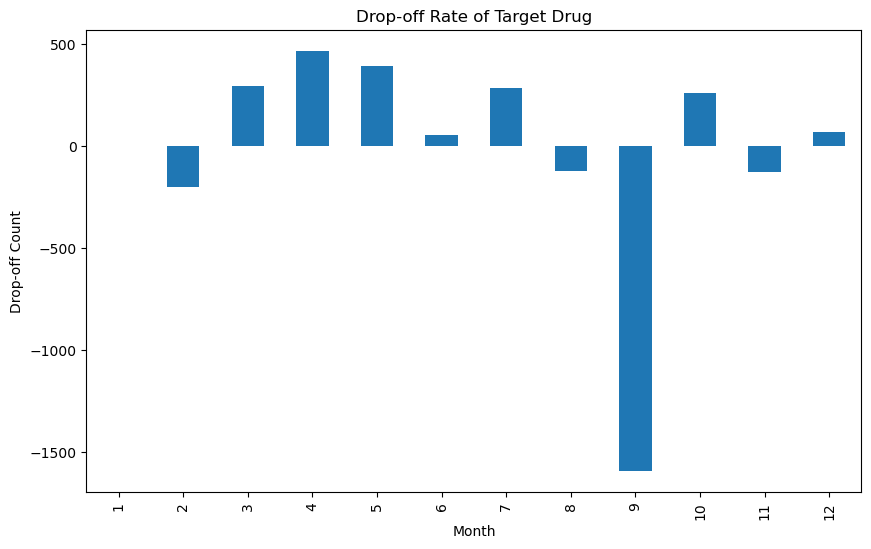

In [7]:
# Visualize the drop-off rate over time
plt.figure(figsize=(10, 6))
dropoff_rates.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug')
plt.show()

In [8]:
# Analyze the events driving drop-off
# Filter the original data to include only patients taking the "Target Drug"
dropoff_reasons = train_df[train_df['Patient-Uid'].isin(target_data['Patient-Uid'])]


In [9]:
# Exclude records after the last treatment date for each patient
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]


In [10]:
# Exclude records related to the "TARGET DRUG" incident itself
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']


In [11]:
# Calculate the frequency of each event leading to drop-off
event_freq = dropoff_reasons['Incident'].value_counts()


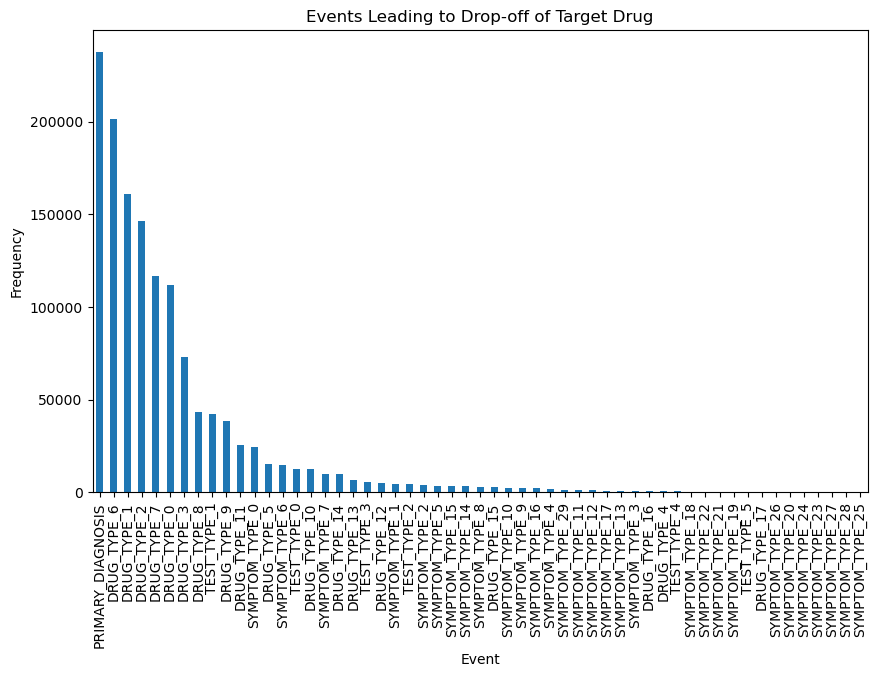

In [12]:
# Plot the events leading to drop-off
plt.figure(figsize=(10, 6))
event_freq.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()

### THE END